# Pricing options using Multi-period Binomial model

# Name: Srikanth Sarma

# Roll No.: ME14B027

Here, computational method of using multi-period binomial model to compute the prices of american put options, down-and-out call options and down-and-in call options is discussed.

We first compute and verify the price of each option at defined parameter values and then establish our approach by performing a convergence analysis. The prices are plotted against the number of stages in the binomial model shows for this purpose.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

S_0 is the current stock price

K is the strike price

T is the expiration time

Vol is the volatality in the stock price

r is the rate of return

n is the number of discrete times when option can be executed

As $n\to\infty$, the price converges to that of a true american put option.

## American Put Option

In [2]:
def AmericanPutOptionPrice(S_0, K, T, Vol, r, n):
    
    u = np.exp(Vol*np.sqrt(T/n))
    d = np.exp(-Vol*np.sqrt(T/n))
    beta = np.exp(-r*T/n)
    p = (1/beta - d)/(u - d)

    V = np.zeros([n+1,n+1])
    
    for i in range(n+1):
        V[n,i] = max(K - u**i * d**(n-i) * S_0, 0)
    
    for k in np.arange(n-1, -1, -1):
        for i in range(k+1):
            V[k,i] = max(K - u**i * d**(k-i) * S_0, beta*(p*V[k+1,i+1]+(1-p)*V[k+1,i]))
            
    return V[0,0]

In [3]:
S_0 = 10.0
K = 15.0
T = 1.0
Vol = 1.0
r = 0.09
n = 100

AmericanPutOptionPrice(S_0, K, T, Vol, r, n)

6.927852307816726

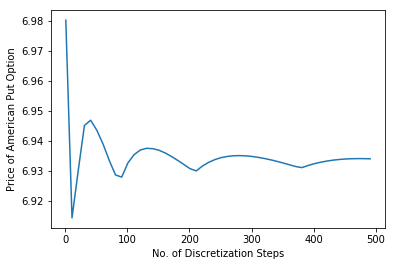

In [4]:
N = 50
price = np.zeros(N)
for i in range(N):
    price[i] = AmericanPutOptionPrice(S_0, K, T, Vol, r, (i+1)*10)
plt.plot(np.arange(1,N*10, 10), price)
plt.ylabel('Price of American Put Option')
plt.xlabel('No. of Discretization Steps')
plt.show()

## Down and Out Call Option

All symbols have the same definitions as before

$v$ is the barrier value

In [5]:
def DownAndOutCallOptionPrice(S_0, K, T, v, Vol, r, n):
    
    u = np.exp(Vol*np.sqrt(T/n))
    d = np.exp(-Vol*np.sqrt(T/n))
    beta = np.exp(-r*T/n)
    p = (1/beta - d)/(u - d)

    V = np.zeros([n+1,n+1])
    
    for i in range(n+1):
        V[n,i] = max(u**i * d**(n-i) * S_0 - K, 0)
    
    for k in np.arange(n-1, -1, -1):
        for i in range(k+1):
            if u**i * d**(k+1-i) * S_0 < v:
                V[k,i] = beta*p*V[k+1,i+1]
            else:
                V[k,i] =beta*(p*V[k+1,i+1]+(1-p)*V[k+1,i])
            
    return V[0,0]

In [6]:
S_0 = 10.0
K = 15.0
T = 1.0
v = 5.0
Vol = 1.0
r = 0.09
n = 100

DownAndOutCallOptionPrice(S_0, K, T, v, Vol, r, n)

2.7182322057274155

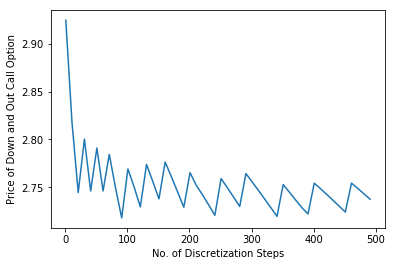

In [7]:
N = 50
price = np.zeros(N)
for i in range(N):
    price[i] = DownAndOutCallOptionPrice(S_0, K, T, v, Vol, r, (i+1)*10)
plt.plot(np.arange(1,N*10, 10), price)
plt.ylabel('Price of Down and Out Call Option')
plt.xlabel('No. of Discretization Steps')
plt.show()

## Down and In Call Option

In [8]:
def DownAndInCallOptionPrice(S_0, K, T, v, Vol, r, n):
    
    u = np.exp(Vol*np.sqrt(T/n))
    d = np.exp(-Vol*np.sqrt(T/n))
    beta = np.exp(-r*T/n)
    p = (1/beta - d)/(u - d)

    V = np.zeros([n+1,n+1])
    
    for i in range(n+1):
        V[n,i] = max(u**i * d**(n-i) * S_0 - K, 0)
    
    for k in np.arange(n-1, -1, -1):
        for i in range(k+1):
            if u**i * d**(k+1-i) * S_0 > v:
                V[k,i] = beta*p*V[k+1,i+1]
            else:
                V[k,i] =beta*(p*V[k+1,i+1]+(1-p)*V[k+1,i])
            
    return V[0,0]

In [9]:
S_0 = 10.0
K = 15.0
T = 1.0
v = 5.0
Vol = 1.0
r = 0.09
n = 100

DownAndInCallOptionPrice(S_0, K, T, v, Vol, r, n)

2.4214726296531723e-27

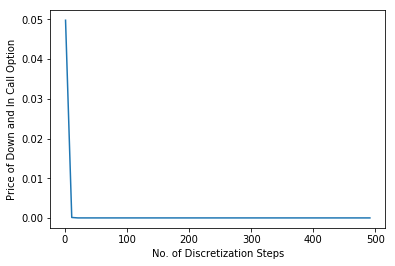

In [10]:
N = 50
price = np.zeros(N)
for i in range(N):
    price[i] = DownAndInCallOptionPrice(S_0, K, T, v, Vol, r, (i+1)*10)
plt.plot(np.arange(1,N*10, 10), price)
plt.ylabel('Price of Down and In Call Option')
plt.xlabel('No. of Discretization Steps')
plt.show()

The sum of Down and Out and Down and In call options gives the price of a European Call option. Using Black Scholes formula, we can verify the validity of our results.

The price of the call option using Black Scholes formula is 2.89 whereas, the sum of Down and Out and Down and In call options is near 2.72. These quatities are close enough and hence, this validates the results obtained.